In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['lines.markeredgecolor'] = 'w'
mpl.rcParams['lines.markeredgewidth'] = .5
mpl.rcParams['font.family'] = 'fantasy'
import numpy as np
from numpy import polyfit, polyval
from scipy.optimize import fsolve

# Homework 6
# Ethan Gallup
# Unid: u1033198

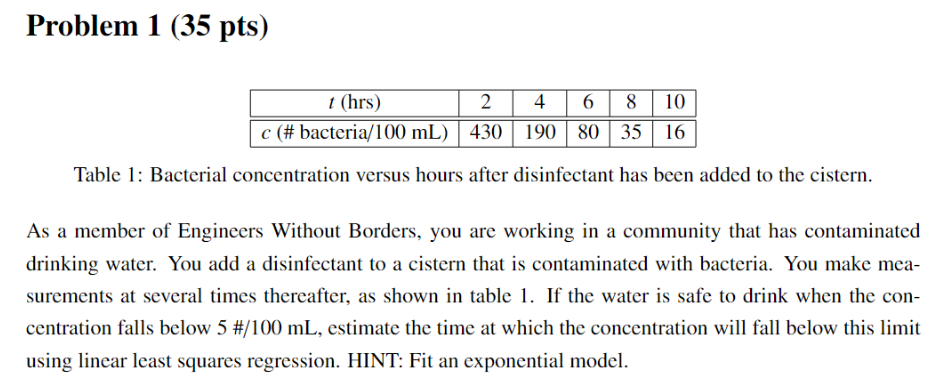

Text(0.5, 1.0, 'concentration v time')

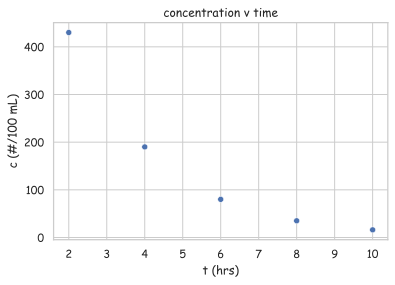

In [100]:
t = np.array([2, 4, 6, 8, 10])
c = np.array([430, 190, 80, 35, 16])
plt.plot(t, c, 'o')
plt.xlabel('t (hrs)')
plt.ylabel('c (#/100 mL)')
plt.title('concentration v time')

1. (10 pts) Based on the data (plot it!), what is a suitable model, with two parameters, that would fit this data?


$$
c = A e^{Bx} + C
$$

2. (5 pts) Convert this model into a form suitable for linear regression


$$
ln(c) = ABx +ln(C) \\
ln(c) = Ax + B
$$

3. (10 pts) Perform least-squares regression on this linearized form. Compare your results to what you obtain from using polyfit regression.

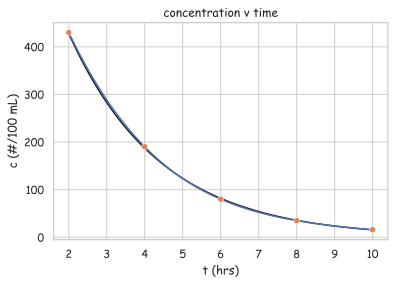

In [101]:
N = len(t)
A = np.column_stack([np.ones(N), t])
ATA = A.T @ A
rhs = A.T @ np.log(c)
sol = np.linalg.solve(ATA, rhs)
a0 = sol[0]
a1 = sol[1]

def linearfit(x):
    return a0 + a1*x

tnew = np.linspace(2, 10, 100)
plt.plot(tnew, np.exp(linearfit(tnew)), 'k-', label='best fit')
coefs = polyfit(t, c, 4)
cnew = polyval(coefs, tnew)
plt.plot(tnew, cnew)
plt.plot(t, c, 'o')
plt.xlabel('t (hrs)')
plt.ylabel('c (#/100 mL)')
plt.title('concentration v time')
plt.show()

Both fits appear to be very good and are practically identical. However, the polyfit seems a little abnormal.

4. (5 pts) Calculate the coefficient of determination.


In [18]:
cbar = sum(c)/N
fi = a1*t + a0
rsq = 1-sum((np.log(c)-linearfit(t))**2)/sum((np.log(c)-cbar)**2)
print(rsq)

0.9999999835321604


5. (5 pts) When is the water safe to drink?


Text(0.5, 1.0, 'concentration v time')

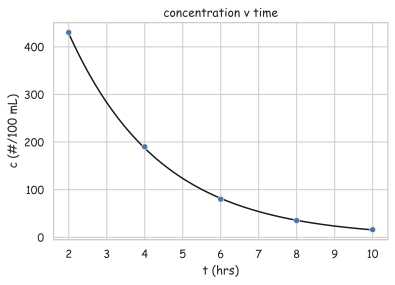

In [102]:
def expfit(x):
    return np.exp(a0)*np.exp(a1*x)


plt.plot(tnew, expfit(tnew), 'k-', label='best fit')
plt.plot(t, c, 'o')
plt.xlabel('t (hrs)')
plt.ylabel('c (#/100 mL)')
plt.title('concentration v time')

In [90]:
def expfit2(x):
    global a0, a1
    return 5-np.exp(a0)*np.exp(a1*x)
m = fsolve(expfit2, 15)[0]
print(f'The water is safe at {m:.2f} time units.')

The water is safe at 12.76 time units.


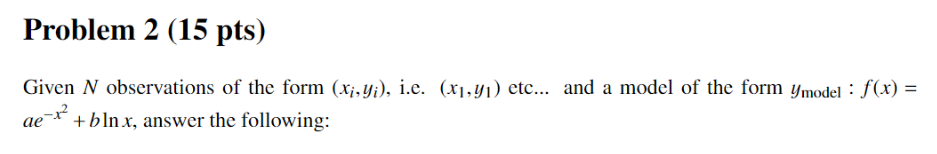

1. (5 pts) List the basis functions for this model.


$$
[e^{-x^2}, ln(x)]
$$

2. (5 pts) Write down the regression matrix (what we called $\mathbf{A}$ in the Normal Equations).


$$
\begin{bmatrix}
e^{-x^2_1} &  ln(x_1) \\
\vdots &  \vdots \\
e^{-x^2_n} &  ln(x_n) \\
\end{bmatrix}
$$

3. (5 pts) Write down the governing system of equations for linear regression using $\mathbf{A}$ and its transpose.

$$
\mathbf{A}^T\mathbf{A}\alpha = \mathbf{A}^Ty \\
\begin{bmatrix}
e^{-x^2_1} & \dots &  e^{-x^2_n} \\
ln(x_1) & \dots &  ln(x_n) \\
\end{bmatrix}
\begin{bmatrix}
e^{-x^2_1} &  ln(x_1) \\
\vdots &  \vdots \\
e^{-x^2_n} &  ln(x_n) \\
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
\end{bmatrix} = 
\begin{bmatrix}
e^{-x^2_1} & \dots &  e^{-x^2_n} \\
ln(x_1) & \dots &  ln(x_n) \\
\end{bmatrix}
\begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}\\
\begin{bmatrix}
\sum e^{-x^2_i}e^{-x^2_i}  &  \sum e^{-x^2_n}ln(x_i) \\
\sum e^{-x^2_n}ln(x_i) &  \sum ln(x_i)ln(x_i) \\
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
\end{bmatrix} = 
\begin{bmatrix}
\sum e^{-x^2_i}y_i\\
\sum ln(x_i)y_i\\
\end{bmatrix}
$$

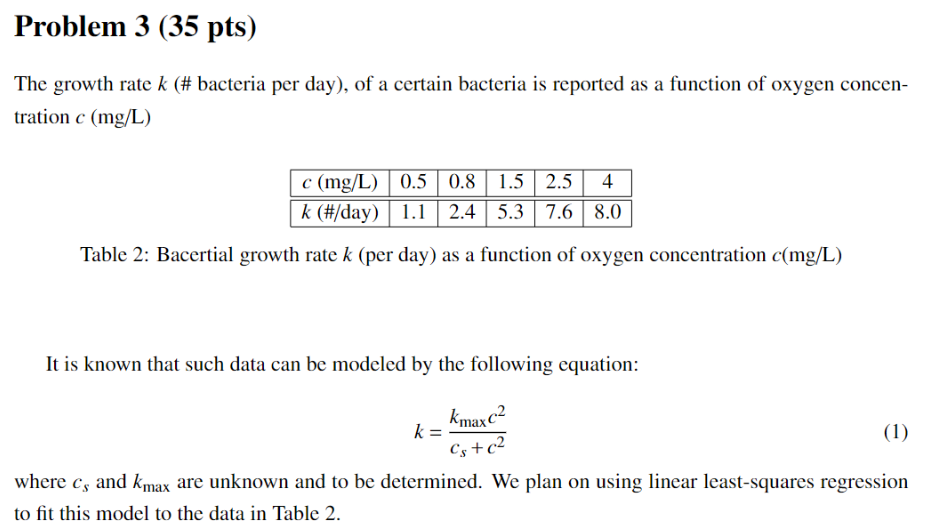

Text(0.5, 1.0, 'growth v concentration')

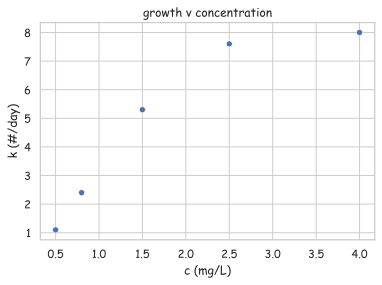

In [103]:
c = np.array([0.5, 0.8, 1.5, 2.5, 4])
k = np.array([1.1, 2.4, 5.3, 7.6, 8.0])
plt.plot(c, k, 'o')
plt.xlabel('c (mg/L)')
plt.ylabel('k (#/day)')
plt.title('growth v concentration')

1. (10 pts) Use algebraic manipulation to transform this equation into a form suitable for regression with a straight line of the form: $y = a_0 +a_1 x$. (HINT: what happens if you take the reciprocal, $1/k$, of the model equation (1)?)

$$
\frac{1}{k} = \frac{c_S + c^2}{k_{max}c^2}\\
\frac{1}{k} = \frac{c_S}{k_{max}c^2} + \frac{1}{k_{max}}\\
\frac{1}{k} = \frac{c_S}{k_{max}}\frac{1}{c^2} + \frac{1}{k_{max}}\\
a_1 = \frac{c_S}{k_{max}},\ \ \ \ 
a_0 = \frac{1}{k_{max}},\ \ \ \ 
y = \frac{1}{k}\\
y = a_0 +a_1 x
$$

2. (10 pts) Write down the linear system of equations that you need to solve to find $a_0$ and $a_1$. Use either the normal equations or the traditional form.

$$
\begin{bmatrix}
1 & 1/c^2 \\
1 & 1/c^2 \\
\end{bmatrix}
\begin{bmatrix}
k_{max} \\
c_S/k_{max} \\
\end{bmatrix} = 
\begin{bmatrix}
1/k \\
1/k \\
\end{bmatrix}
$$

3. (5 pts) Solve the above system of equations for $a_0$ and $a_1$.

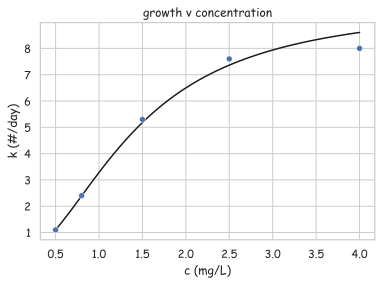

In [104]:
N = len(c)
A = np.column_stack([np.ones(N), 1/c**2])
ATA = A.T @ A
rhs = A.T @ (1/k)
sol = np.linalg.solve(ATA, rhs)
a0 = sol[0]
a1 = sol[1]

def linearfit(x):
    return a0 + a1*x

cnew = np.linspace(0.5, 4, 100)
plt.plot(cnew, 1/(linearfit(1/cnew**2)), 'k-', label='best fit')
plt.plot(c, k, 'o')
plt.xlabel('c (mg/L)')
plt.ylabel('k (#/day)')
plt.title('growth v concentration')

plt.show()

4. (5 pts) Compute the $R^2$ value for this fit and comment on your finding.

In [96]:
kbar = sum(1/k)/N
fi = a1/c**2 + a0
rsq = 1-sum((1/k-fi)**2)/sum((1/k-kbar)**2)
print(rsq)

0.9997358177195926


The fit isn't perfect but it is very good.

5. (5 pts) For an oxygen concentration of 2.1 mg/L, what is the bacterial growth rate?

In [98]:
print(f'growth rate: {1/(linearfit(1/2.1**2)):.2f} growths/day')

growth rate: 6.70 growths/day


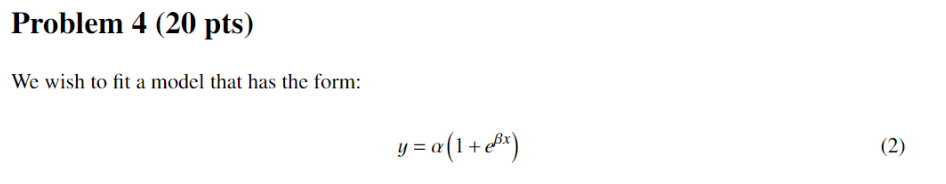

1. (2 pts) Will this model result in linear or nonlinear regression? Explain.

Nonlinear because parameters do not show up linearly and the least-squares equations cannot be written as a system of linear equations.

2. (5 pts) Write out the sum of the squares of the errors, $S = \sum(y_i − f_i)^22$, and identify the unknown quantities. Keep things in summation form.

$$
S = \sum(y_i − f_i)^2\\
S = \sum^N_{i=1} (y_i - \alpha(1+e^{\beta x}))^2 \\
$$
unknowns:
$
\alpha,\ \ \beta
$

3. (5 pts) What are the conditions for which $S$ is a minimum? (list the conditions only).

$$
\frac{\partial S}{\partial \alpha} = 0\\
\frac{\partial S}{\partial \beta} = 0
$$

4. (8 pts) In light of the previous question, write the system of equations that must be solved to find
the unknown quantities. Note that we did not learn how to solve this system yet.

$$
0 = -\sum (e^{\beta x}+1)^2\\
0 = -2\alpha xe^{\beta x}(e^{\beta x} + 1)
$$